# nlopt's AUGLAG: different local optimiser experiments

nlopt's Augmented Lagrangian solver is well-suited to Process due to its ability to handle non-linear objective functions, equality and inequality constraints. However, some of the optimisation problems (defined in the regression tests) that currently solve with VMCON don't solve with nlopt. This can be due to unevaluatable points in the optimisation paramter space (which VMCON happens not to hit), or due to the local optimiser that the main AUGLAG optimiser uses to optimise the Lagrangian function.

This can be explored to see if other local optimisers are better suited to the type of problem that Process defines.

## Derivative-free

COBYLA

In [1]:
from plot_solvers import run_input_file, plot_solver_comparison

# Run baseline_jan_2017 using vmcon
baseline_jan_2017_vmcon_mfile_path = run_input_file("baseline_jan_2017", "legacy-vmcon")

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 The number of iteration variables is counted automatically and does not need to be stated in IN.DAT.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-499-gbc0b935d4
    Branch : nlopt-test
   Git log : Add caching to evaluators
 Date/time : 17 Oct 2022 16:36:15 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory : /home/jon/code/notebooks/nlopt_process
     Input : /home/jon/code/notebo

In [2]:
# Run baseline_jan_2017 using nlopt
baseline_jan_2017_nlopt_cobyla_mfile_path = run_input_file("baseline_jan_2017", "nlopt")

 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 The number of iteration variables is counted automatically and does not need to be stated in IN.DAT.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-499-gbc0b935d4
    Branch : nlopt-test
   Git log : Add caching to evaluators
 Date/time : 17 Oct 2022 16:36:23 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory : /home/jon/code/notebooks/nlopt_process
     Input : /home/jon/code/notebo

KeyboardInterrupt: 

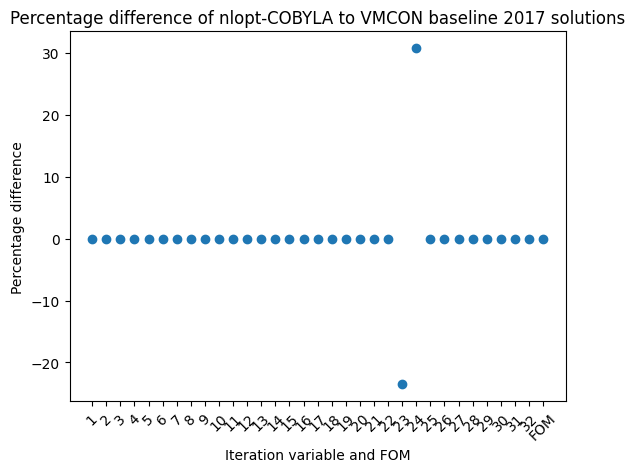

In [4]:
plot_solver_comparison(
    baseline_jan_2017_vmcon_mfile_path,
    baseline_jan_2017_nlopt_cobyla_mfile_path,
    "vmcon",
    "nlopt-cobyla",
    "Percentage difference of nlopt-COBYLA to VMCON baseline 2017 solutions"
)


The solution is the same as before.

It's interesting that VMCON solves in 5s, COBYLA takes 3m20s. Perhaps some tweaking to the main/local optimiser balance is required? Need to compare convergence too.

In [6]:
# Run baseline_jan_2017 using vmcon
iter_vmcon_mfile_path = run_input_file("ITER", "legacy-vmcon")

 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-499-gbc0b935d4
    Branch : nlopt-test
   Git log : Add caching to evaluators
 Date/time : 17 Oct 2022 16:20:15 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory : /home/jon/code/notebooks/nlopt_process
     Input : /home/jon/code/notebooks/nlopt_process/data/ITER_legacy-vmcon_IN.DAT
 Run title : Run Title (change this line using input variable 'runtitle')
  Run type : Reactor concept design: Steady-state tokamak model, (c) CCFE
 
 ***

In [3]:
# Run iter using nlopt
iter_nlopt_cobyla_mfile_path = run_input_file("ITER", "nlopt")

 
Iteration 1, objective function = -5.3, constraint residuals = 0.000e+00
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-499-gbc0b935d4
    Branch : nlopt-test
   Git log : Add caching to evaluators
 Date/time : 17 Oct 2022 16:49:47 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory : /home/jon/code/notebooks/nlopt_process
     Input : /home/jon/code/notebooks/nlopt_process/data/ITER_nlopt_IN.DAT
 Run title : Run Title (change this line using input variable 'runtitle')
  Run type : R

/home/jon/code/process/process/availability.py:856: RuntimeWarning: invalid value encountered in true_divide
  u_unplanned_bop = (bop_mttr * bop_num_failures) / (cv.t_operation)
/home/jon/code/process/process/availability.py:960: RuntimeWarning: invalid value encountered in double_scalars
  u_unplanned_vacuum = max(0.005, t_down / (cv.t_operation + t_down))


Iteration 40, objective function = -5.3, constraint residuals = 2.137e+00
Iteration 41, objective function = -5.3, constraint residuals = 2.041e+00
Iteration 42, objective function = -5.3, constraint residuals = 1.427e+01
Iteration 43, objective function = -5.3, constraint residuals = 2.122e+00
Iteration 44, objective function = -5.3, constraint residuals = 1.103e+05
Iteration 45, objective function = -5.3, constraint residuals = 2.304e+00
Iteration 46, objective function = -5.3, constraint residuals = 5.288e+01
Iteration 47, objective function = -5.3, constraint residuals = 2.040e+00
Iteration 48, objective function = -5.3, constraint residuals = 4.084e+01
Iteration 49, objective function = -5.3, constraint residuals = 2.038e+00
Iteration 50, objective function = -5.3, constraint residuals = 3.724e+00
Iteration 51, objective function = -5.3, constraint residuals = 2.037e+00
Iteration 52, objective function = -5.3, constraint residuals = 3.708e+00
Iteration 53, objective function = -5.

KeyboardInterrupt: 

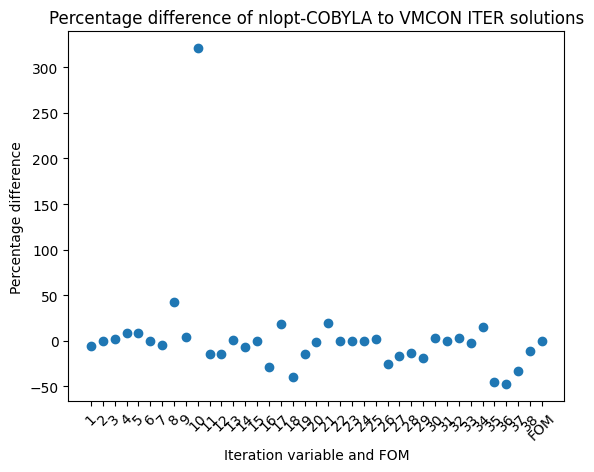

In [7]:
plot_solver_comparison(
    iter_vmcon_mfile_path,
    iter_nlopt_cobyla_mfile_path,
    "vmcon",
    "nlopt-cobyla",
    "Percentage difference of nlopt-COBYLA to VMCON ITER solutions"
)
